# Modelo linear generalizado - Distribuição binomial

Adaptado de http://wiki.icmc.usp.br/images/6/69/Exemplo-binomial-2023.pdf

Um modelo binomial com função de ligação canônica é ajustado aos dados do Exemplo 5, pag. 16 do
livro Demétrio, C. G. B. (2002), Modelos Lineares Generalizados em Experimentação Agronômica, ESALQ
(https://docs.ufpr.br/~niveam/micro%20da%20sala/bom/Apostila%20de%20MLG.pdf).

O modelo relaciona a probabilidade de que um inseto (pulgão) morra com a dose do inseticida (rotenone).
Para cada dose foram utilizados m insetos no experimento dos quais y morreram após um certo tempo de
exposição ao inseticida. Seis doses diferentes foram testadas. Esse tipo de estudo é conhecido como ensaio
dose-resposta.

A linguagem Python é utilizada no exemplo.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import logistic
from scipy.stats import norm

In [2]:
dose = np.array([10.2, 7.7, 5.1, 3.8, 2.6, 0.0])
m = np.array([50, 49, 46, 48, 50, 49])
y = np.array([44, 42, 24, 16, 6, 0])
resposta = np.column_stack((y, m - y))
pmortos = y / m

O objeto resposta representa a variável resposta e tem duas colunas: número de insetos mortos e número de
insetos sobreviventes. O número de insetos no estudo foi

In [3]:
np.sum(m)

292

Os dados neste exemplo estão na forma agregada. Na forma bruta terîamos um vetor de respostas binárias
$y$ (292 × 1) e um vetor $x$ (292 × 1) com os valores das doses, sendo que 10,2 estaria repetido 50 vezes, . . . ,
0,0 estaria repetido 49 vezes.

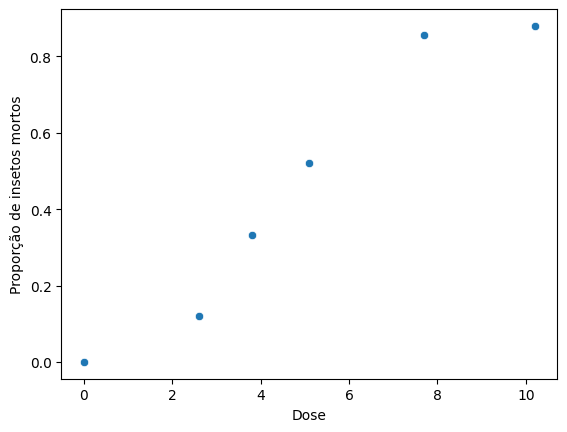

In [4]:
sns.scatterplot(x=dose, y=pmortos)
plt.xlabel("Dose")
plt.ylabel("Proporção de insetos mortos")
plt.show()

In [5]:
model = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial())
mcan = model.fit()
mcan.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           ['y1', 'y2']   No. Observations:                    6
Model:                            GLM   Df Residuals:                        4
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14.739
Date:                Fri, 08 Sep 2023   Deviance:                       10.258
Time:                        22:39:53   Pearson chi2:                     9.70
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2257      0.370     -8.720      0.000      -3.951      -2.501
x1             0.6051      0.068      8.924      0.000       0.472       0.738
==============================================================================
"""

O objeto *mcan* contém diversos resultados do ajuste

In [6]:
print(mcan.__dict__['__doc__'])


    Class to contain GLM results.

    GLMResults inherits from statsmodels.LikelihoodModelResults

    Attributes
    ----------
    df_model : float
        See GLM.df_model
    df_resid : float
        See GLM.df_resid
    fit_history : dict
        Contains information about the iterations. Its keys are `iterations`,
        `deviance` and `params`.
    model : class instance
        Pointer to GLM model instance that called fit.
    nobs : float
        The number of observations n.
    normalized_cov_params : ndarray
        See GLM docstring
    params : ndarray
        The coefficients of the fitted model.  Note that interpretation
        of the coefficients often depends on the distribution family and the
        data.
    pvalues : ndarray
        The two-tailed p-values for the parameters.
    scale : float
        The estimate of the scale / dispersion for the model fit.
        See GLM.fit and GLM.estimate_scale for more information.
    stand_errors : ndarray
        Th

As proporções de insetos mortos e o modelo ajustado são mostrados na figura abaixo

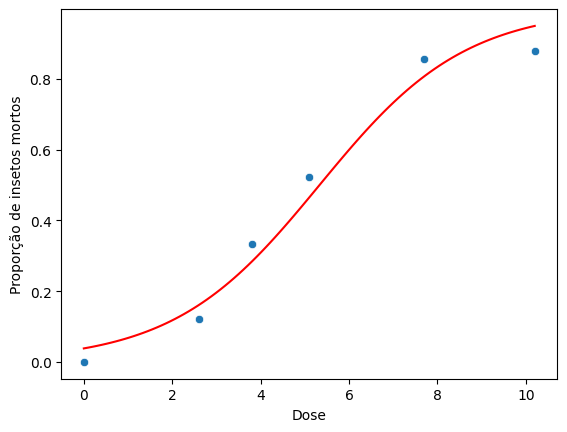

In [7]:
b0 = mcan.params[0]
b1 = mcan.params[1]

X = np.linspace(dose.min(), dose.max(), 100)

sns.scatterplot(x=dose, y=pmortos)
plt.xlabel("Dose")
plt.ylabel("Proporção de insetos mortos")
sns.lineplot(x=X, y=logistic.cdf(b0 + b1*X), color="red")
plt.show()

In [8]:
## Intervalos de confiança assintóticos
# Aproximação pela dist. normal
pd.DataFrame(mcan.conf_int(0.05), columns=["Inf", "Sup"], index=["(Intercept)", "dose"])

# Intervalos de confiança (veros. perfilada)
# (por fazer)

,Inf,Sup
(Intercept),-3.950686,-2.500640
dose,0.472216,0.738036


## Funções de ligação
As funções de ligação logito (regressão logística), probito e complemento log-log são bastante utilizadas no
modelo binomial. As expressões são dadas abaixo, sendo que $\eta = x > \beta \in R$ é o preditor linear, $\pi = \mu / m$ e $\Phi$ denota a função distribuição acumulada da distribuição normal $(0, 1)$.

$$\log\left(\frac{\pi}{1-\pi}\right) = \eta, \quad \pi = \frac{e^\eta}{1 + e^\eta}: \quad \text{logito},$$

$$\Phi^{-1} \left(\pi\right) = \eta, \quad \pi = \Phi \left(\eta\right): \quad \text{probito},$$

$$\log\left(-\log\left(1-\pi\right)\right) = \eta, \quad \pi = 1- \exp\left(-\exp\left(\eta\right)\right): \quad \text{complemento log-log}.$$

As funções de ligação logito e probito são simétricas, significando que $\pi\left(\eta\right) = 1 - \pi\left(-\eta\right)$ para todo $\eta \in \mathbb{R}$. Com a função de ligação complemento log-log, temos $\pi\left(\eta\right) \geq 1 - \pi\left(-\eta\right)$ para todo $\eta > 0$.

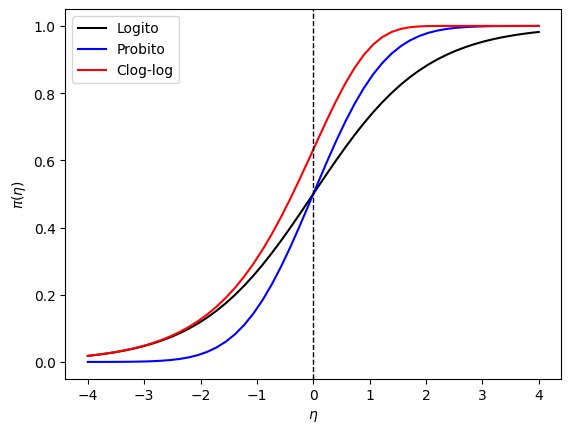

In [9]:
## Inversa das funções de ligação
# Complemento log-log (Clog-log)
def ploglog(x):
    return(1 - np.exp(-np.exp(x)))

X = np.linspace(-4, 4, 50)

sns.lineplot(x=X, y=logistic.cdf(X), color="black", label="Logito")
sns.lineplot(x=X, y=norm.cdf(X), color="blue", label="Probito")
sns.lineplot(x=X, y=ploglog(X), color="red", label="Clog-log")
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.xlabel(r"$\eta$")
plt.ylabel(r"$\pi\left(\eta\right)$")
plt.show()

**Nota 1**. Modelos com as funções de ligação probito e complemento log-log são ajustados com os comandos
abaixo.

In [10]:
mprob = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial(link=sm.families.links.Probit()))
mloglog = sm.GLM(resposta, sm.add_constant(dose), family=sm.families.Binomial(link=sm.families.links.CLogLog()))